## Phase 5 Capstone Project

Group Members

* Wendy Muturi
* Mulei Mutuku
* Margaret Mitey
* Jeff Kiarie
* Linus Gichuhi
* Joshua Ooko

## Business Understanding

### Introduction

In an age where culinary diversity and dining out have become integral parts of our social fabric, choosing the perfect restaurant can be both exciting and overwhelming. With an abundance of dining options ranging from quaint bistros to exotic eateries, making a dining decision has never been more challenging.
Traditional restaurant websites have long relied on filters based on amenities, location, or cuisine types, providing users with a plethora of options to sift through. However, as the restaurant industry evolves and culinary landscapes expand, the need for a more refined and personalized approach to restaurant discovery has become evident.
Enter the era of restaurant recommendation systems—a technological marvel that goes beyond the mundane task of filtering restaurants based on their amenities. These systems leverage the power of data science, machine learning, and user preferences to deliver tailored dining suggestions that match your unique tastes and preferences.

In a world where time is precious and choices are abundant, restaurant recommendation systems offer an invaluable solution by enhancing the dining experience in ways that traditional filters simply cannot.
This article delves into the world of restaurant recommendation systems, exploring their importance, functionality, and the transformative impact they have on the way we discover and enjoy culinary delights.
We will unveil how these intelligent algorithms are reshaping the gastronomic landscape, catering to the ever-evolving preferences of diners and revolutionizing the art of restaurant selection. Join us on this journey as we unravel the magic of restaurant recommendation systems, offering a taste of the future of dining exploration.


### Problem Statement

Traditional restaurant search platforms rely on static filters that do not adapt to individual preferences, resulting in time-consuming and often frustrating experiences for diners who seek restaurants that align with their unique tastes.
By prioritizing amenities over personalized recommendations, existing systems hinder the exploration of new culinary experiences and limit the potential for serendipitous discoveries that could enhance the dining experience.


### Main Objective

To develop an interactive and user-friendly restaurant recommendation system.

### Specific Objective
To design and develop a user-friendly website that seamlessly integrates the advanced restaurant recommendation system, allowing users to access personalized dining suggestions.

To identify and analyze key factors that significantly influence restaurant ratings and user preferences, incorporating this knowledge into the recommendation system's algorithms.

To implement a robust data collection and processing pipeline to continually update user data and restaurant information, ensuring the recommendation system remains dynamic and accurate.

### Metric of Success

To consider our project successful, we aim to achieve high accuracy in classifying user sentiment, maintain a low Root Mean Square Error (RMSE) in predicting engagement, and offer insightful location-based analysis.


## Data Understanding

We will collect Yelp review data, including text reviews, star ratings, and business information, from the [Yelp dataset](https://www.yelp.com/dataset), which is publicly available and contains a large number of reviews across various businesses and locations.Our plan involves obtaining a substantial sample of Yelp reviews spanning different business categories, locations, and star ratings. This data will serve as our training and evaluation dataset.

Features include: 
**review_id:** A unique identifier for each review,

**user_id:** A unique identifier for each user who submitted a review,

**business_id:** A unique identifier for each business being reviewed,

**stars:** The rating given by the user in terms of stars (e.g., 1.0, 2.0, 3.0, 4.0, 5.0),

**useful:** A count of how many users found the review useful,

**funny:** A count of how many users found the review funny,

**cool:** A count of how many users found the review cool,

**text:** The actual text content of the review and

**date:** The date and time when the review was submitted.Due to the dataset being large we have constricted it to 15,438 rows which should be enough for nlp modeling.




In [1]:
# importing necesarry packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# plotting styles
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# loading the businesses dataset
business= pd.read_csv("./data/business.csv")
# previewing the datasetdata.loc[ data.categories.str.contains('Restaurants')]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
# viewing the datasets features/columns
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   54380 non-null  object 
 1   name          54380 non-null  object 
 2   address       52551 non-null  object 
 3   city          54380 non-null  object 
 4   state         54380 non-null  object 
 5   postal_code   54360 non-null  object 
 6   latitude      54380 non-null  float64
 7   longitude     54380 non-null  float64
 8   stars         54380 non-null  float64
 9   review_count  54380 non-null  int64  
 10  is_open       54380 non-null  int64  
 11  attributes    49543 non-null  object 
 12  categories    54342 non-null  object 
 13  hours         45975 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.8+ MB


In [4]:
# loading the second dataset review.csv
review=pd.read_csv("./data/review.csv")
# previewing the dataset
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [5]:
# viewing the datasets features/columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    54380 non-null  object 
 1   user_id      54380 non-null  object 
 2   business_id  54380 non-null  object 
 3   stars        54380 non-null  float64
 4   useful       54380 non-null  int64  
 5   funny        54380 non-null  int64  
 6   cool         54380 non-null  int64  
 7   text         54380 non-null  object 
 8   date         54380 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


> After previewing both of the datasets, we now merge them into one dataset, using the **business_id** column as primary key so as to obtain all the feature in one dataset for easier analysis. 

In [6]:
# merging te two datasets into one using the business_id primary key

data=pd.merge(left=review , right=business, how='left', on='business_id')

# previewing the new merge dataset
data.head()


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [7]:
# previewing the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54380 entries, 0 to 54379
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     54380 non-null  object 
 1   user_id       54380 non-null  object 
 2   business_id   54380 non-null  object 
 3   stars_x       54380 non-null  float64
 4   useful        54380 non-null  int64  
 5   funny         54380 non-null  int64  
 6   cool          54380 non-null  int64  
 7   text          54380 non-null  object 
 8   date          54380 non-null  object 
 9   name          54380 non-null  object 
 10  address       53926 non-null  object 
 11  city          54380 non-null  object 
 12  state         54380 non-null  object 
 13  postal_code   54380 non-null  object 
 14  latitude      54380 non-null  float64
 15  longitude     54380 non-null  float64
 16  stars_y       54380 non-null  float64
 17  review_count  54380 non-null  int64  
 18  is_open       54380 non-nu

In [8]:
data.to_csv("./data/data.csv", index=False)

In [9]:
data.describe()

,stars_x,useful,funny,cool,latitude,longitude,stars_y,review_count,is_open
count,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000
mean,3.844980,0.890438,0.253567,0.346396,36.050556,-89.005350,3.769796,389.177014,0.766532
std,1.352256,1.866532,1.035998,1.073067,5.289909,14.446695,0.671340,628.925711,0.423041
min,1.000000,0.000000,0.000000,0.000000,27.584300,-120.026076,1.000000,5.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,29.967159,-90.239235,3.500000,61.000000,1.000000
50%,4.000000,0.000000,0.000000,0.000000,38.612534,-86.252569,4.000000,170.000000,1.000000
75%,5.000000,1.000000,0.000000,0.000000,39.946685,-75.325252,4.000000,430.000000,1.000000
max,5.000000,91.000000,98.000000,49.000000,53.644501,-74.658572,5.000000,4554.000000,1.000000


## Data Preparation

In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;

- Renaming columns
- Checking Dealing with missing data
- Checking and removing duplicates 
- Feature Engineering
- Selecting the Relevant Columns
- Droping Irrelevant columns


### Renaming columns

Renaming the **stars_x** and **stars_y** columns into **rating** and **b/s_rating** columns for better understanding

In [10]:
data.rename(columns={'stars_x':'rating', 'stars_y':'b/s_rating'}, inplace=True)

### Dealing with missing data

In [11]:
# checking fro columns with missing values
data.isna().sum()

review_id          0
user_id            0
business_id        0
rating             0
useful             0
funny              0
cool               0
text               0
date               0
name               0
address          454
city               0
state              0
postal_code        0
latitude           0
longitude          0
b/s_rating         0
review_count       0
is_open            0
attributes       842
categories         2
hours           3101
dtype: int64

> The main columns in our analysis, that will be used to develope the recommendation system are **user_id**, **business_id** and **rating**. Therefore, since the columns that have missing values only provide metadata/ more information about our restaurants i.e **address, attribute, categories ** **and hours**, then we will impute the missing values with "Not-Avaliable" since they won't influence our analysis 


In [12]:
# Imputing missing values in the address column with "Not-Available"
data.address.fillna(value="Not-Available", inplace=True)

In [13]:
# Imputing missing values in the attributes column with "Not-Available" 
data.attributes.fillna(value="Not-Available", inplace=True)

In [14]:
# Imputing missing values in the categories column with "Not-Available" 
data.categories.fillna(value="Not-Available", inplace=True)

In [15]:
# Imputing missing values in the hours column with "Not-Available" 
data.hours.fillna(value="Not-Available", inplace=True)

In [16]:
# previewing our changes
data.isna().sum()

review_id       0
user_id         0
business_id     0
rating          0
useful          0
funny           0
cool            0
text            0
date            0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
b/s_rating      0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

### Dealing with Duplicates

In [17]:
# checking for duplicated columns
print("Duplicates: ",data.duplicated().sum())

Duplicates:  0


> - Our data has no duplicates

### Feature Engineering

In feaure engineering, we will combine the **city**, **state**, **address** columns to form one column, **location** column.

In [18]:
# combining the address columns
data['location']=data[['city','state','address']]\
            .apply( lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ", axis=1)

# then we drop the combined columns
data.drop(columns=['state', 'city','address'], axis=1, inplace=True)

data.location

0        State:PA, City:North Wales, Address:1460 Bethl...
1        State:PA, City:Philadelphia, Address:1923 Ches...
2        State:AZ, City:Tucson, Address:748 W Starr Pas...
3        State:PA, City:Philadelphia, Address:2481 Gran...
4        State:LA, City:New Orleans, Address:2549 Banks...
                               ...                        
54375       State:ID, City:Boise, Address:590 E Boise Ave 
54376    State:MO, City:Saint Louis, Address:1 S Broadway 
54377    State:CA, City:Santa Barbara, Address:119 E Co...
54378    State:LA, City:New Orleans, Address:1418 Magaz...
54379    State:PA, City:West Chester, Address:1233 W Ch...
Name: location, Length: 54380, dtype: object

In [19]:
# categories
data.categories

0        Restaurants, Breakfast & Brunch, Food, Juice B...
1        Active Life, Cycling Classes, Trainers, Gyms, ...
2                          Restaurants, Breakfast & Brunch
3                    Halal, Pakistani, Restaurants, Indian
4        Sandwiches, Beer, Wine & Spirits, Bars, Food, ...
                               ...                        
54375                                    Thai, Restaurants
54376                                   Restaurants, Pizza
54377    Food, Farmers Market, Specialty Food, Fruits &...
54378    Vegetarian, Restaurants, Breakfast & Brunch, C...
54379              Pizza, Restaurants, Sandwiches, Italian
Name: categories, Length: 54380, dtype: object

### Data Spliting
Since our data contains several businesses other than restaurants, then w'll only selects the business that are restaurants

In [20]:
# skecting only the restaurants from our dataset
data=data.loc[ data.categories.str.contains('Restaurants')].copy()
data.shape

(39334, 20)

### Droping Irrelevant columns
The columns **funny, cool, is_open, and date ** are not informative in our analysis and will not be used during analysis, therefore we drop them

In [21]:
# droping unrelevant collumn
cols=['review_id','postal_code','funny', 'cool', 'is_open', 'date']
data.drop(columns=cols, axis=1, inplace=True)

## Explatory Data Analysis

#### 1.Distribution of Ratings

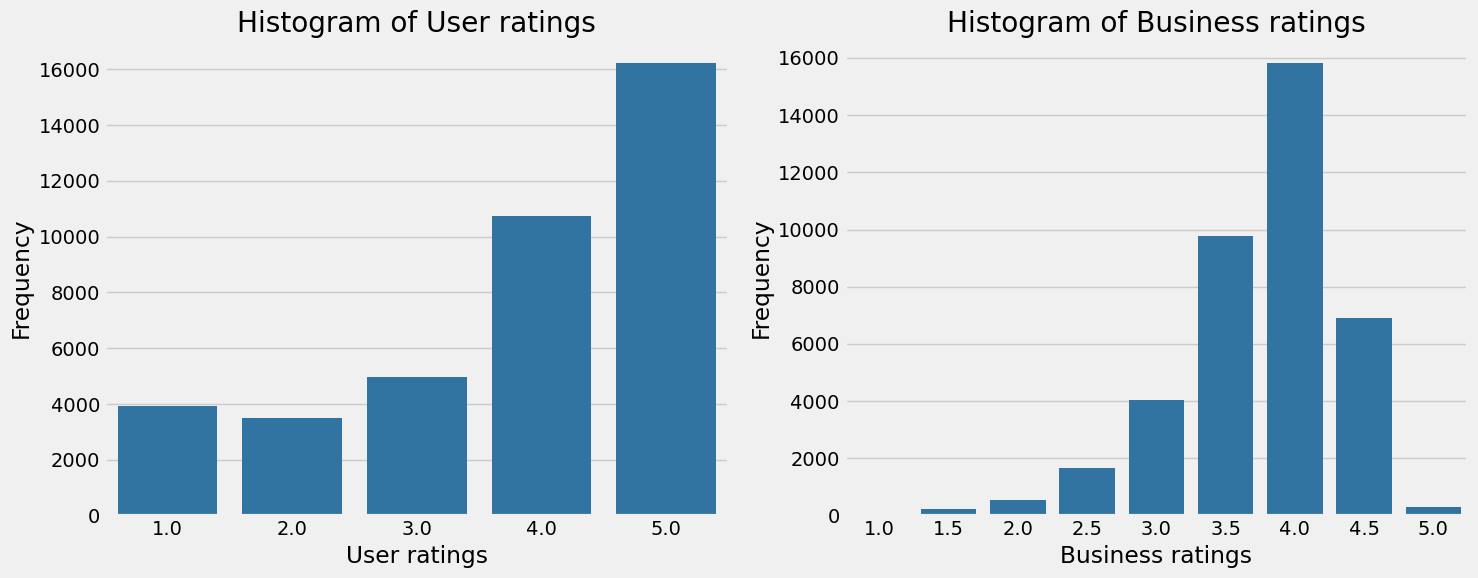

In [22]:
# Assuming you have a DataFrame named 'df' and two numerical columns 'column1' and 'column2'
column1 = 'rating'
column2 = 'b/s_rating'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figsize as needed

# Create histograms for column1 and column2
 
sns.countplot(data=data, x=column1 ,ax=axes[0] , color='tab:blue')
# Adjust the number of bins as needed
axes[0].set_xlabel("User ratings")
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of User ratings')

sns.countplot(data=data, x=column2 ,ax=axes[1] ,color='tab:blue')
  # Adjust the number of bins as needed
axes[1].set_xlabel("Business ratings")
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Business ratings')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
df_1 = data[['rating', 'b/s_rating', 'review_count']]
df_1.corr()

,rating,b/s_rating,review_count
rating,1.000000,0.409173,0.106111
b/s_rating,0.409173,1.000000,0.237139
review_count,0.106111,0.237139,1.000000


#### 2.Distribution of Categories

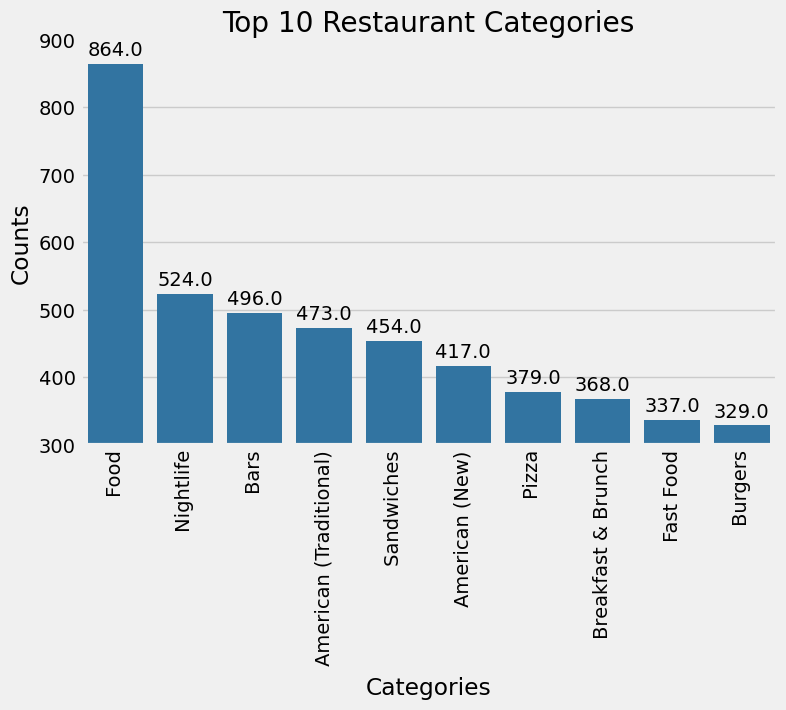

In [24]:
import collections
# list of all categories
categories=[ cat for category in data.drop_duplicates('business_id').categories for cat in category.split(',')]
# list of unique categories only
categories=collections.Counter(categories)
#picking the top 20 categories
common=categories.most_common(12)
# ploting
fig, ax=plt.subplots(figsize=(8,5))
x=[ i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([300,900])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');

#### 3 Distribution of Restaurants

##### i)cities

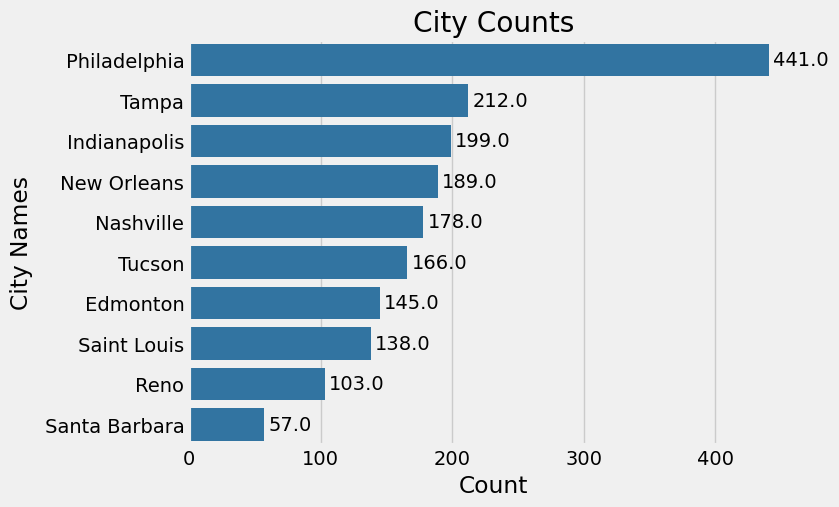

In [25]:

location= data.drop_duplicates('business_id')[['location']]
city=location.location.apply(lambda x: x.split(',')[1].replace("City:",''))
city=collections.Counter(city)
city=city.most_common(10)
y=[i[0] for i in city]
x=[i[1] for i in city]
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot( y=y, x=x, color='tab:blue')
ax.set_ylabel("City Names")
ax.set_xlabel("Count")
ax.set_title("City Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

##### ii) States

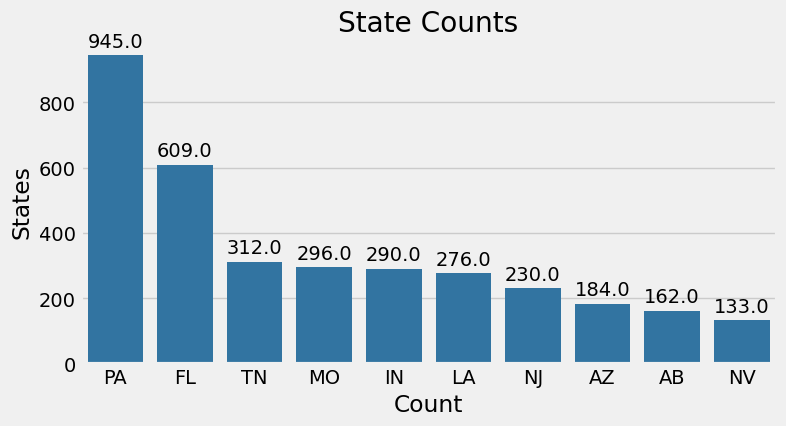

In [26]:
states=location.location.apply(lambda x: x.split(',')[0].replace("State:",''))
states=collections.Counter(states)
states=states.most_common(10)
y=[i[0] for i in states]
x=[i[1] for i in states]
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot( y=x,x=y , color='tab:blue')
ax.set_ylabel("States")
ax.set_xlabel("Count")
ax.set_title("State Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');